In [3]:
  !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
  !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
  !apt-get update -qq 2>&1 > /dev/null
  !apt-get -y install -qq google-drive-ocamlfuse fuse
  from google.colab import auth
  auth.authenticate_user()
  from oauth2client.client import GoogleCredentials
  creds = GoogleCredentials.get_application_default()
  import getpass
  !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
  vcode = getpass.getpass()
  !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131323 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [5]:
%cd drive

/content/drive


In [6]:
%cd Problem Cars_ Dataset

/content/drive/Problem Cars_ Dataset


In [85]:
import pandas as pd
import numpy as np
df=pd.read_csv('train.csv')
df

,id,fuel,ABS-compatibility,parking-sensor,symboling,normalized-losses,num-of-doors,body-style,manufacturer,condition,...,engine-size,battery-type,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,petrol,ABS not supported,not installed,3,142,two,convertible,mercedes-benz,new,...,234,sli,3.46,3.1,8.30,155,4750,16,18,35056
1,1,petrol,ABS not supported,installed,-1,110,four,wagon,dodge,new,...,122,li-ion,3.34,3.46,8.50,88,5000,24,30,8921
2,2,petrol,ABS supported,not installed,-1,95,four,sedan,volvo,new,...,141,sli,3.78,3.15,9.50,114,5400,19,25,22625
3,3,petrol,ABS supported,installed,1,158,four,sedan,audi,new,...,131,sli,3.13,3.4,8.30,140,5500,17,20,23875
4,4,petrol,ABS not supported,installed,0,108,four,sedan,nissan,new,...,181,sli,3.43,3.27,9.00,152,5200,19,25,13499
5,5,petrol,ABS not supported,installed,1,122,four,sedan,nissan,new,...,97,li-ion,3.15,3.29,9.40,69,5200,31,37,7499
6,6,petrol,ABS not supported,installed,-1,137,four,sedan,mitsubishi,new,...,110,wetcell,3.17,3.46,7.50,116,5500,23,30,9279
7,7,petrol,ABS not supported,installed,-1,65,four,sedan,toyota,new,...,122,sli,3.31,3.54,8.70,92,4200,27,32,10898
8,8,petrol,ABS not supported,installed,-1,65,four,hatchback,toyota,new,...,122,sli,3.31,3.54,8.70,92,4200,27,32,11248
9,9,petrol,ABS not supported,installed,1,?,four,wagon,audi,new,...,136,sli,3.19,3.4,8.50,110,5500,19,25,18920


In [86]:
df.replace({'?': np.nan}, inplace=True)
missing=df.isnull().sum()
missing

id                    0
fuel                  0
ABS-compatibility     0
parking-sensor        0
symboling             0
normalized-losses    35
num-of-doors          1
body-style            0
manufacturer          0
condition             0
wheel-base            0
length                0
width                 0
height                0
car-weight            0
engine-type           0
num-of-persons        0
engine-size           0
battery-type          0
bore                  3
stroke                3
compression-ratio     0
horsepower            1
peak-rpm              1
city-mpg              0
highway-mpg           0
price                 3
dtype: int64

In [0]:

df['price'] = df['price'].fillna(-100).astype(int)
df['bore'] = df['bore'].fillna(-100).astype(float)
df['normalized-losses'] = df['normalized-losses'].fillna(-100).astype(float)
df['stroke'] = df['stroke'].fillna(-100).astype(float)
df['horsepower'] = df['horsepower'].fillna(-100).astype(float)
df['peak-rpm'] = df['peak-rpm'].fillna(-100).astype(float)

In [88]:
cleanup_nums = {"num-of-doors":     {"four": 4, "two": 2},
                "num-of-persons": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 },
                  "condition":     {"new": 1, "old": 0},
                "fuel": {"petrol":1,"diesel":0 },
               "ABS-compatibility":{"ABS not supported":0,"ABS supported":1}}

df.replace(cleanup_nums, inplace=True)
df.head()

,id,fuel,ABS-compatibility,parking-sensor,symboling,normalized-losses,num-of-doors,body-style,manufacturer,condition,...,engine-size,battery-type,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,1,0,not installed,3,142.0,2.0,convertible,mercedes-benz,1,...,234,sli,3.46,3.10,8.3,155.0,4750.0,16,18,35056
1,1,1,0,installed,-1,110.0,4.0,wagon,dodge,1,...,122,li-ion,3.34,3.46,8.5,88.0,5000.0,24,30,8921
2,2,1,1,not installed,-1,95.0,4.0,sedan,volvo,1,...,141,sli,3.78,3.15,9.5,114.0,5400.0,19,25,22625
3,3,1,1,installed,1,158.0,4.0,sedan,audi,1,...,131,sli,3.13,3.40,8.3,140.0,5500.0,17,20,23875
4,4,1,0,installed,0,108.0,4.0,sedan,nissan,1,...,181,sli,3.43,3.27,9.0,152.0,5200.0,19,25,13499


In [0]:
obj_df = df.select_dtypes(include=['object']).copy()


In [0]:
one=one_hot_encoded_training_predictors = pd.get_dummies(obj_df)

In [0]:
bigdata = pd.concat([df, one],axis=1)
bigdatas=bigdata.drop(['parking-sensor','body-style','manufacturer','engine-type','battery-type'],axis=1)

In [0]:
bigdatas1=bigdatas.replace(-100, np.nan)

In [93]:
from fancyimpute import KNN 
train_cols = list(bigdatas1)
dm= pd.DataFrame(KNN(k=5).fit_transform(bigdatas1))
dm.columns = dm.columns
dm.index = dm.index

Imputing row 1/170 with 0 missing, elapsed time: 0.018
Imputing row 101/170 with 1 missing, elapsed time: 0.019


In [0]:
dm.columns=['id', 'fuel', 'ABS-compatibility', 'symboling', 'normalized-losses',
       'num-of-doors', 'condition', 'wheel-base', 'length', 'width', 'height',
       'car-weight', 'num-of-persons', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'parking-sensor_installed',
       'parking-sensor_not compatible', 'parking-sensor_not installed',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'manufacturer_alfa-romero',
       'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_chevrolet',
       'manufacturer_dodge', 'manufacturer_honda', 'manufacturer_isuzu',
       'manufacturer_jaguar', 'manufacturer_mazda',
       'manufacturer_mercedes-benz', 'manufacturer_mercury',
       'manufacturer_mitsubishi', 'manufacturer_nissan', 'manufacturer_peugot',
       'manufacturer_plymouth', 'manufacturer_porsche', 'manufacturer_renault',
       'manufacturer_saab', 'manufacturer_subaru', 'manufacturer_toyota',
       'manufacturer_volkswagen', 'manufacturer_volvo', 'engine-type_dohc',
       'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
       'battery-type_agm', 'battery-type_dc', 'battery-type_li-ion',
       'battery-type_msli', 'battery-type_sli', 'battery-type_ssli',
       'battery-type_vrla', 'battery-type_wetcell']

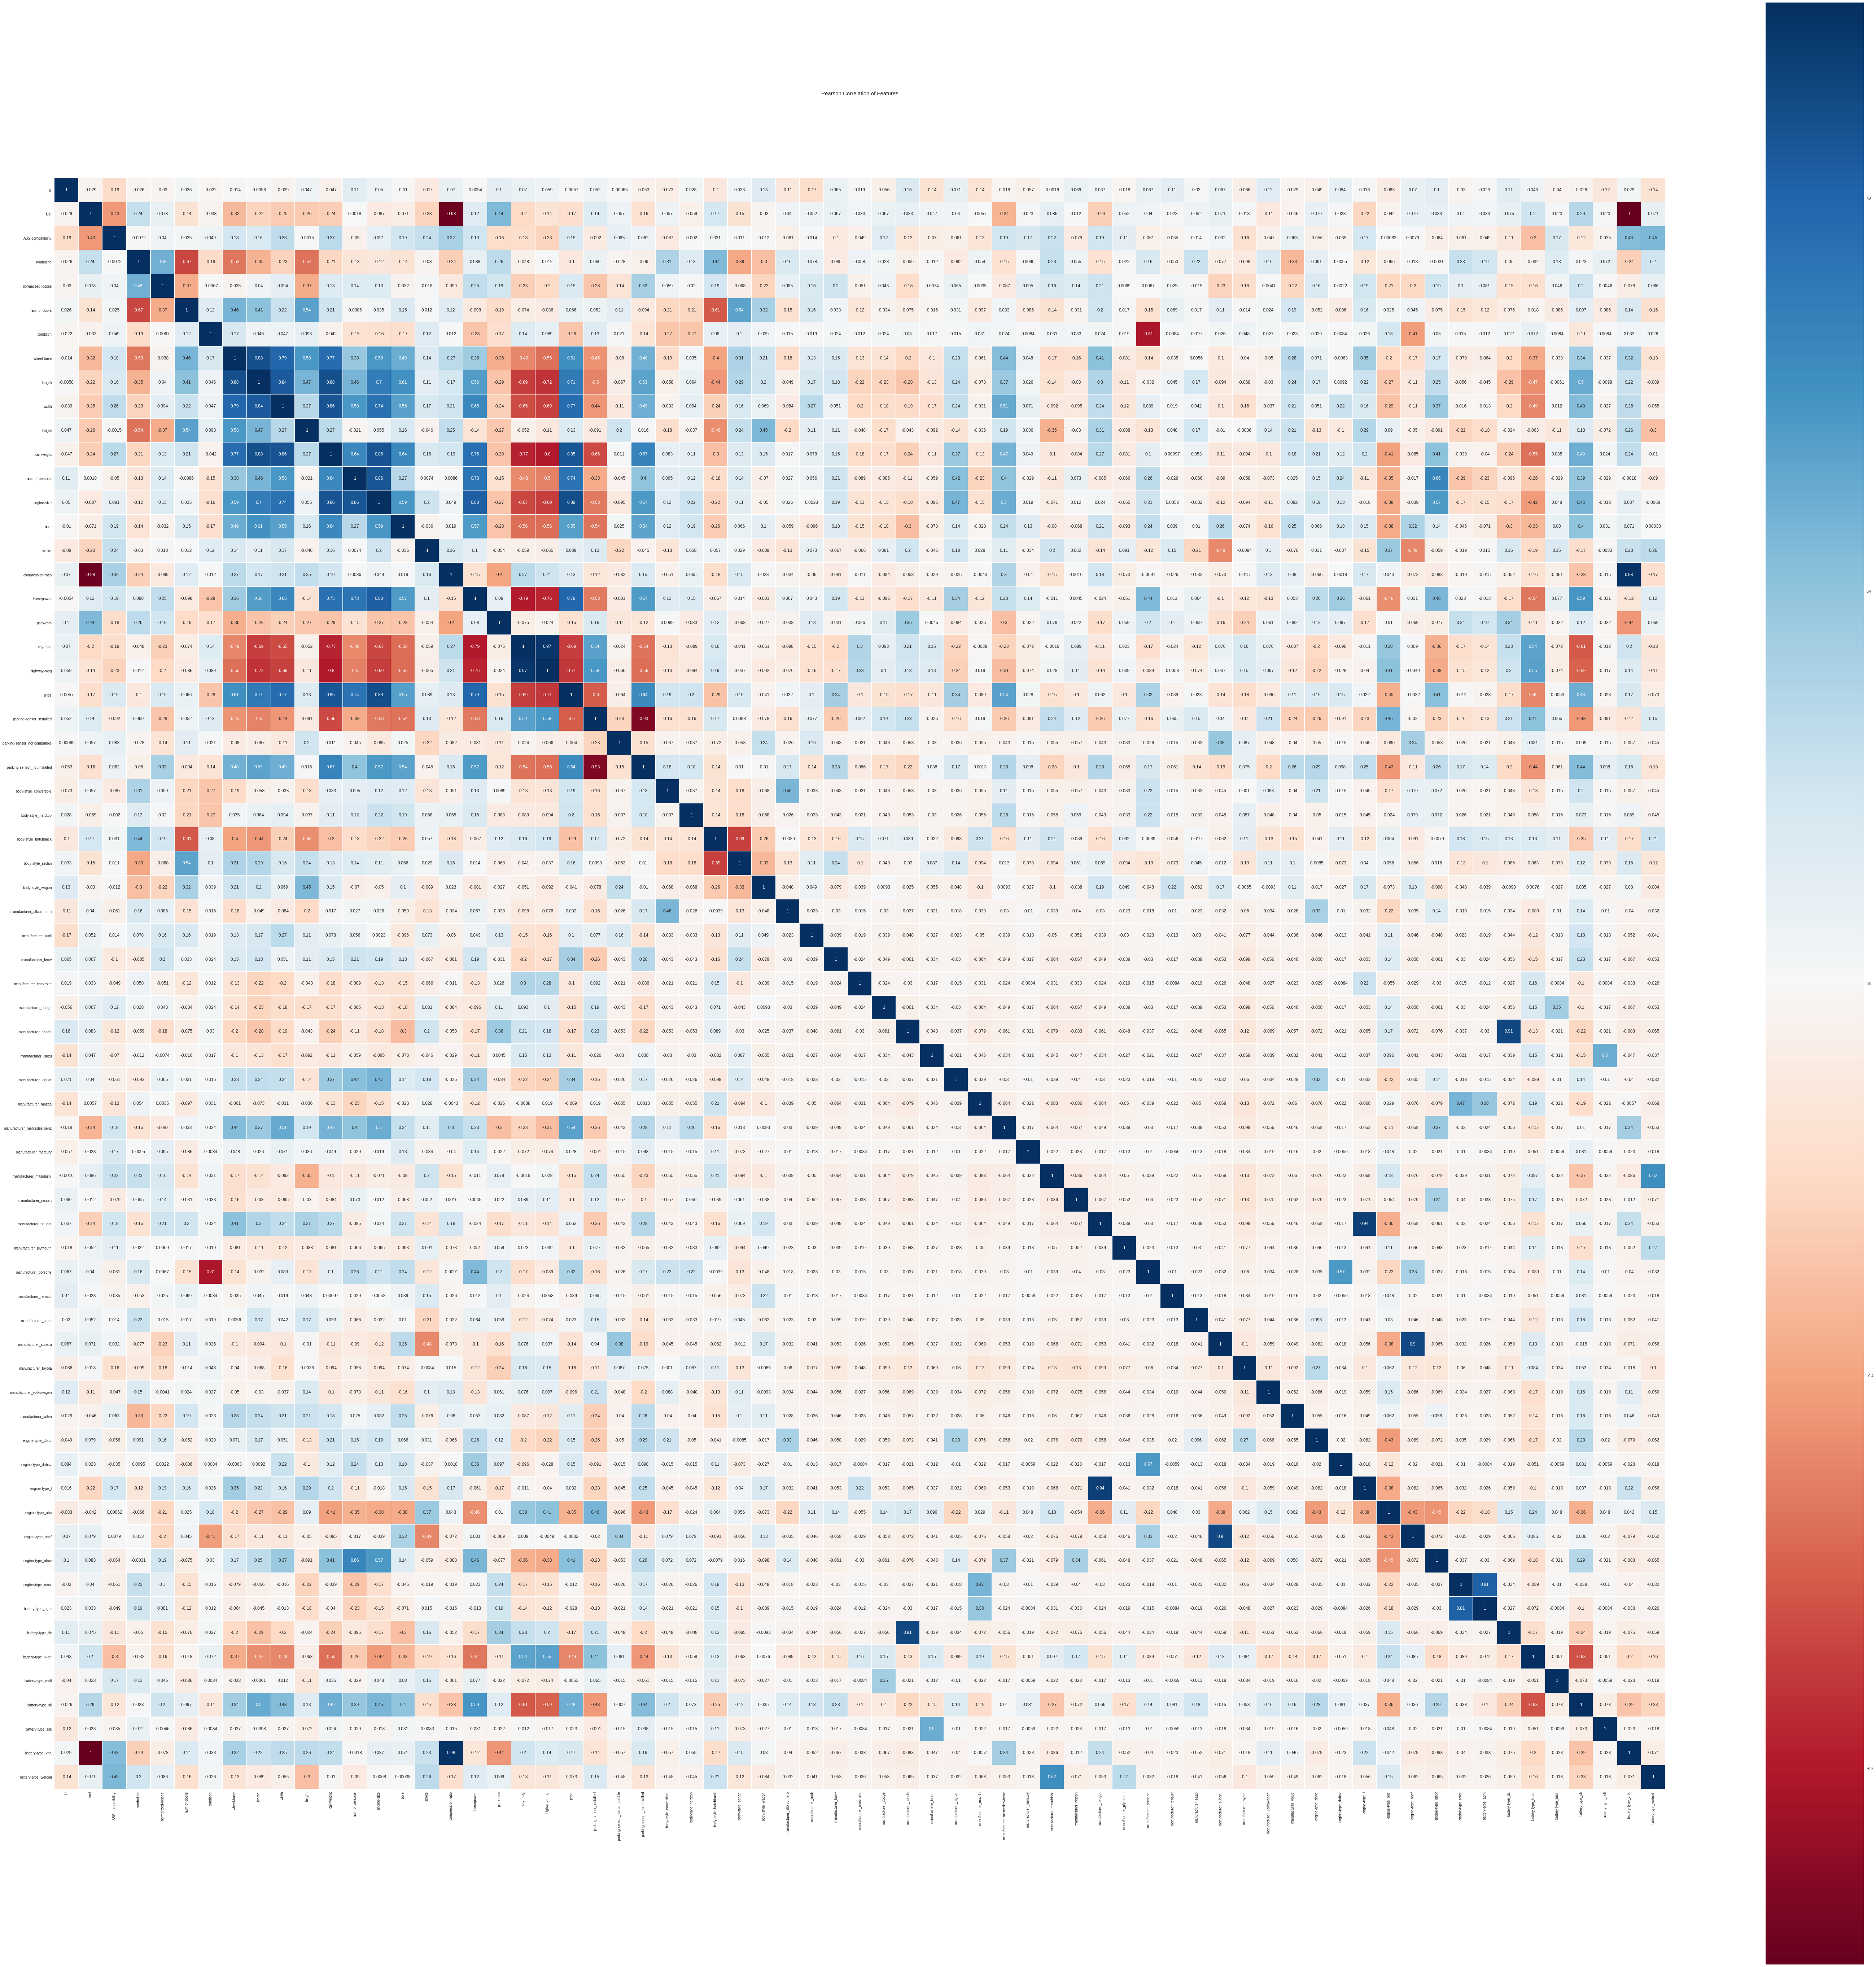

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(100,100))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(dm.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [0]:
corr_price=dm.loc[:, (dm.corr()['price'].abs()) > 0.4]

In [0]:
y_train=corr_price['price']
x_train=corr_price.drop(['price'],axis=1)

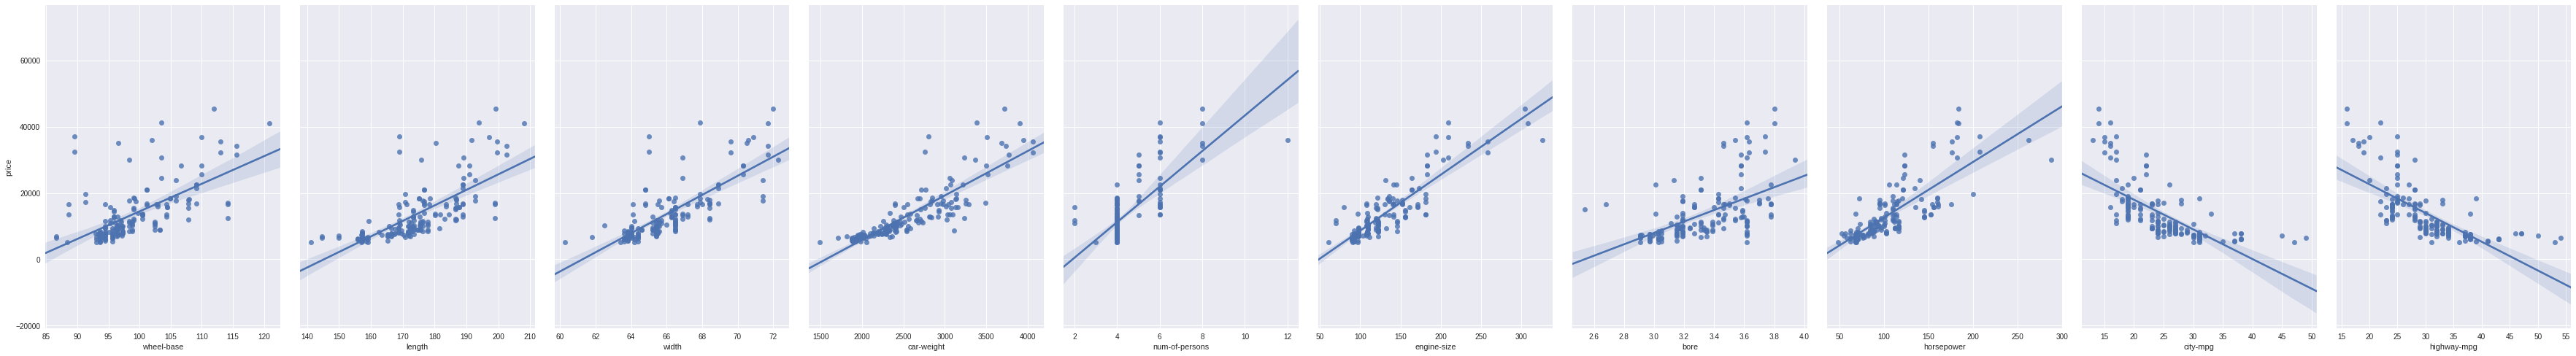

In [105]:
sns.pairplot(dm, x_vars=['wheel-base', 'length', 'width', 'car-weight', 'num-of-persons',
       'engine-size', 'bore', 'horsepower', 'city-mpg', 'highway-mpg',
       ], y_vars='price', size=7, aspect=0.7, kind='reg')

In [0]:
x_train=x_train.drop(['manufacturer_mercedes-benz', 'engine-type_ohcv'],axis=1)

In [100]:
x_train.shape


(170, 14)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [0]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
y_pred = regr.predict(X_test)

In [103]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, y_pred) 

0.028389505221556394

In [0]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(regr, open(filename, 'wb'))